In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm

import pickle
from scipy import stats

import seaborn as sns
from scipy.special import kolmogorov, erf
from scipy.special import gamma, factorial
from scipy.optimize import minimize, Bounds

In [2]:
data = np.loadtxt("lAngles.txt", skiprows=0)
data.shape

(1000000, 2)

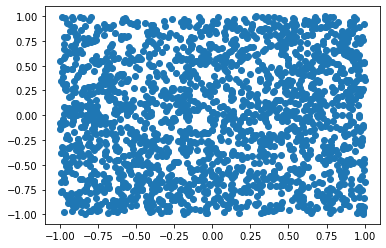

In [3]:
plt.scatter(data[::500,0], data[::500,1])

In [19]:
 def SingleTagDistribution_OneFrame(x, params):
    """ x - vector of values [costheta,sintheta,sintheta1, sinphi1]  """

    alpha, alpha_sinphi = params
    costheta,sintheta,sintheta1, sinphi1 = x
    
    distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*sintheta*sintheta1*sinphi1
    
    return distr 

In [22]:
 def SingleTagDistribution(x, params):
    """ x - vector of values [costheta,costhetap]  """
     
    alpha, alpha_sinphi = params
    costheta,costhetap = x
    sintheta = np.sqrt(1-costheta*costheta)
    distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*costhetap
    
    return distr 

In [23]:
def LogLikelihood(params, data=[], func=SingleTagDistribution):  
    l = 0
    for i in range(len(data)):
        l+= np.log(func(data[i,:], params)) 
    #print(l, params)
    return l

In [24]:
def Maximize_LogLikelihood(params, data=[], func=SingleTagDistribution):
    print(params)
    return -LogLikelihood(params, data, func)


In [25]:
x0 = np.array([0, 0.5])
#bnds = ((1.00001, 100), (0.0001, 100))
Estimates = minimize(Maximize_LogLikelihood, x0, args=(data[::500,:],SingleTagDistribution) )
#Estimates = minimize(Maximize_LogLikelihood, x0, args=(tau1,Gamma_density),method='TNC', bounds=bnds, tol=1e-10)

[0.  0.5]
[1.49011612e-08 5.00000000e-01]
[0.         0.50000001]
[1.00531955 0.40287846]
[1.00531957 0.40287846]
[1.00531955 0.40287847]
[5.02659777 0.0143923 ]
[5.02659779 0.0143923 ]
[5.02659777 0.01439231]
[21.11171064 -1.53955234]
[21.11171066 -1.53955234]
[21.11171064 -1.53955233]


<ipython-input-22-f84e5902bb57>:7: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*costhetap


[85.45216212 -7.75533091]
[85.45216214 -7.75533091]
[85.45216212 -7.75533089]
[342.81396805 -32.61844516]
[342.81396806 -32.61844516]
[342.81396805 -32.61844515]
[1372.26119175 -132.07090219]
[1372.26119177 -132.07090219]
[1372.26119175 -132.07090217]
[5490.05008657 -529.88073029]
[5490.05008658 -529.88073029]
[5490.05008657 -529.88073027]
[21961.20566583 -2121.12004269]
[21961.20566585 -2121.12004269]
[21961.20566583 -2121.12004268]
[87845.82798288 -8486.0772923 ]
[87845.8279829 -8486.0772923]
[87845.82798288 -8486.07729229]
[351384.31725108 -33945.90629076]
[351384.31725109 -33945.90629076]
[351384.31725108 -33945.90629074]
[1405538.27432386 -135785.22228458]
[1405538.27432388 -135785.22228458]
[1405538.27432386 -135785.22228456]
[5622154.102615   -543142.48625985]
[5622154.10261501 -543142.48625985]
[5622154.102615   -543142.48625983]
[22488617.41577955 -2172571.54216094]
[22488617.41577956 -2172571.54216094]
[22488617.41577955 -2172571.54216092]
[89954470.66843773 -8690287.7657653 

[ 8.02420695e+51 -7.75199632e+50]
[ 3.20968278e+52 -3.10079848e+51]
[ 3.20968283e+52 -3.10079848e+51]
[ 3.20968278e+52 -3.10079853e+51]
[ 1.28387311e+53 -1.24031939e+52]
[ 1.28387313e+53 -1.24031939e+52]
[ 1.28387311e+53 -1.24031941e+52]
[ 5.13549245e+53 -4.96127757e+52]
[ 5.13549252e+53 -4.96127757e+52]
[ 5.13549245e+53 -4.96127764e+52]
[ 2.05419698e+54 -1.98451103e+53]
[ 2.05419701e+54 -1.98451103e+53]
[ 2.05419698e+54 -1.98451106e+53]
[ 8.21678792e+54 -7.93804411e+53]
[ 8.21678804e+54 -7.93804411e+53]
[ 8.21678792e+54 -7.93804423e+53]
[ 3.28671517e+55 -3.17521764e+54]
[ 3.28671522e+55 -3.17521764e+54]
[ 3.28671517e+55 -3.17521769e+54]
[ 1.31468607e+56 -1.27008706e+55]
[ 1.31468609e+56 -1.27008706e+55]
[ 1.31468607e+56 -1.27008708e+55]
[ 5.25874427e+56 -5.08034823e+55]
[ 5.25874434e+56 -5.08034823e+55]
[ 5.25874427e+56 -5.08034831e+55]
[ 2.10349771e+57 -2.03213929e+56]
[ 2.10349774e+57 -2.03213929e+56]
[ 2.10349771e+57 -2.03213932e+56]
[ 8.41399083e+57 -8.12855717e+56]
[ 8.41399095e+

<ipython-input-22-f84e5902bb57>:7: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*costhetap


[2.01063911 0.30575693]
[4.02127822 0.11151384]
[4.02127823 0.11151384]
[4.02127822 0.11151385]
[ 8.04255644 -0.27697232]
[ 8.04255645 -0.27697232]
[ 8.04255644 -0.27697231]
[16.08511287 -1.05394464]
[16.08511289 -1.05394464]
[16.08511287 -1.05394463]
[32.17022574 -2.60788928]
[32.17022576 -2.60788928]
[32.17022574 -2.60788927]
[64.34045148 -5.71577856]
[64.3404515  -5.71577856]
[64.34045148 -5.71577855]
[128.68090296 -11.93155713]
[128.68090298 -11.93155713]
[128.68090296 -11.93155711]
[257.36180593 -24.36311426]
[257.36180594 -24.36311426]
[257.36180593 -24.36311424]
[514.72361185 -49.22622851]
[514.72361187 -49.22622851]
[514.72361185 -49.2262285 ]
[1029.4472237   -98.95245703]
[1029.44722372  -98.95245703]
[1029.4472237   -98.95245701]


<ipython-input-22-f84e5902bb57>:7: RuntimeWarning: invalid value encountered in sqrt
  distr = 1+alpha*costheta*costheta+alpha_sinphi*np.sqrt(1-alpha**2)*costheta*costhetap


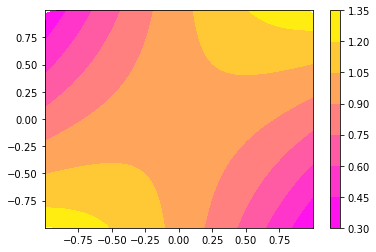

In [32]:
x = np.random.uniform(-1,1,(5000,2))

z = np.zeros(len(x))
for i in range(len(x)):
    z[i] = SingleTagDistribution(x[i,:], [-0.2, 0.5])
    
from scipy.spatial import Delaunay
tri = Delaunay(x)
elems = tri.simplices

plt.tricontourf(x[:,0], x[:,1], elems, z, cmap="spring")
plt.colorbar()

In [28]:
z.shape,x.shape

((1000,), (1000, 2))

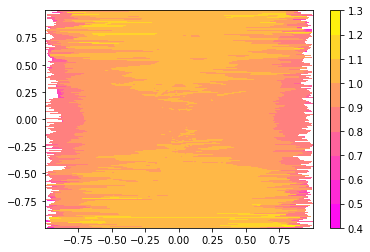

In [31]:
x = np.random.uniform(-1,1,(5000,4))

z = np.zeros(len(x))
for i in range(len(x)):
    z[i] = SingleTagDistribution_OneFrame(x[i,:], [-0.2, 0.5])
    
from scipy.spatial import Delaunay
tri = Delaunay(x[:,1:3])
elems = tri.simplices

plt.tricontourf(x[:,0], x[:,1], elems, z, cmap="spring")
plt.colorbar()